## Polytope Climate-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots. Specifically this notebook shows how to do server side interpolation to a supported grid.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [1]:
import earthkit.data
import earthkit.plots
import earthkit.regrid

# This request matches multiple parameter of the climate DT

request = {
    'activity': 'scenariomip',
    'class': 'd1',
    'dataset': 'climate-dt',
    'date': '20300101',
    'time': "0000",
    'experiment': 'SSP3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'IFS-NEMO',
    'param': '167',
    'realization': '1',
    'resolution': 'high',
    'stream': 'clte',
    'grid' : 'O2560', # currently O, F, N grids are supported 
    'type': 'fc',
}

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


2025-06-02 16:43:10 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20300101'\n"
            'experiment: SSP3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            'grid: O2560\n'
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            "param: '167'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-06-02 16:43:12 - INFO - Request accepted. Please poll ./6c2433d5-ecb4-4579-abac-0591c508e877 for status
2025-06-02 16:43:12 - INFO - Checking request status (./6c2433d5-ecb4-4579-abac-0591c508e877)...
2025-06-02 16:43:12 - INFO - The current status of the request is 'queued'
2025-06-02 16:43:13 - INFO - The current status of the request is 'processing'
2025-06-02 16:45:42 - INFO - The current status of the request is 'pro

In [2]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20300101,0,0,fc,None,reduced_gg


In [4]:
data.to_xarray(engine='cfgrib')

/opt/homebrew/Caskroom/miniforge/base/envs/earthkit/lib/python3.13/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<xarray.Dataset> Size: 526MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, values: 26306560)
Coordinates:
  * time               (time) datetime64[ns] 8B 2030-01-01
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
    latitude           (values) float64 210MB ...
    longitude          (values) float64 210MB ...
    valid_time         (time, step) datetime64[ns] 8B ...
Dimensions without coordinates: values
Data variables:
    t2m                (time, step, heightAboveGround, values) float32 105MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          1003
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-02T16:46 GRIB to CDM+CF via cfgrib-0.9.1...

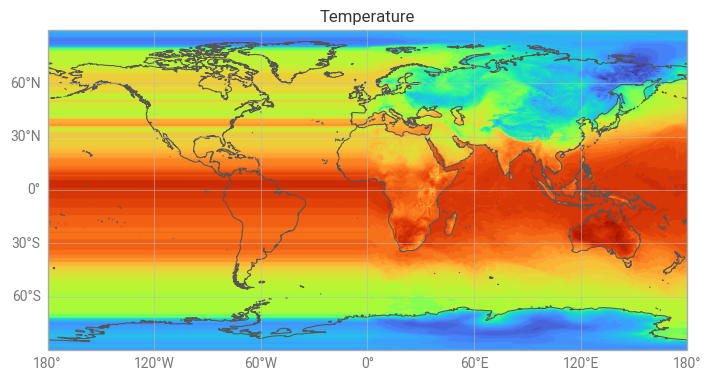

In [5]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.block(
    data
)

chart.title("Temperature")
chart.coastlines()
chart.gridlines()
chart.show()